In [1]:
%matplotlib inline
import sys
sys.path.append('RubiksCube_TwophaseSolver')
import solver as sv

loading conj_twist table...
loading conj_ud_edges table...
loading flipslice sym-tables...
loading move_twist table...
loading move_flip table...
loading move_slice_sorted table...
loading move_u_edges table...
loading move_d_edges table...
loading move_ud_edges table...
loading move_corners table...
loading phase1_prun table...
loading phase2_prun table...
loading phase2_cornsliceprun table...


In [2]:
from RubiksCube_TwophaseSolver import cubie, face
from compatibility import *

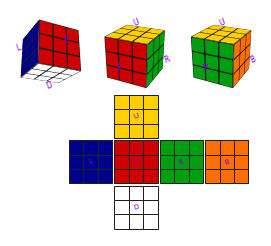

In [3]:
cb = cubie.CubieCube()
renderCubie(cb)
pass

U2 D1 R2 F3 D2 R2 U1 R1 L2 B3 U2 F2 D2 B2 R1 L1 U2 R3 B2 (19f)
moved U 0 2
moved U 2 3
moved R 0 2
moved F 0 3
moved U 2 2
moved R 0 2
moved U 0 1
moved R 0 1
moved R 2 2
moved F 2 1
moved U 0 2
moved F 0 2
moved U 2 2
moved F 2 2
moved R 0 1
moved R 2 3
moved U 0 2
moved R 0 3
moved F 2 2


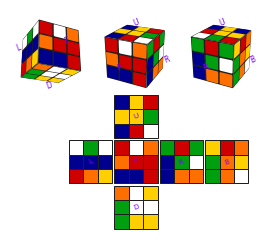

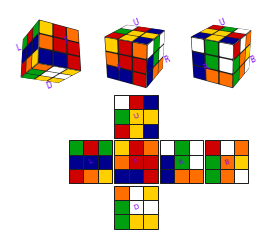

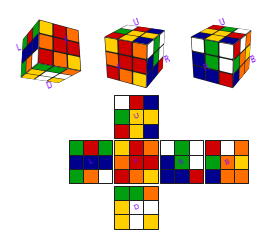

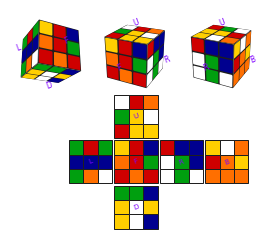

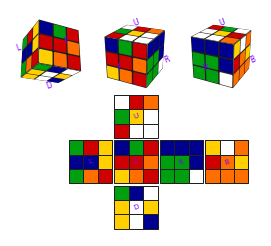

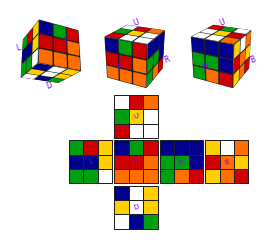

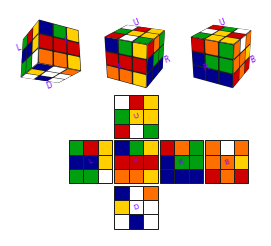

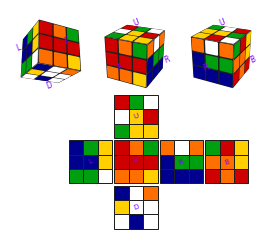

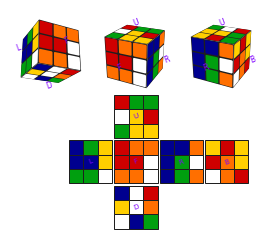

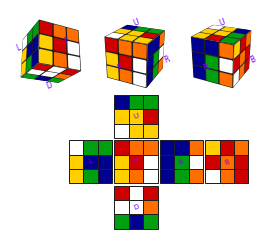

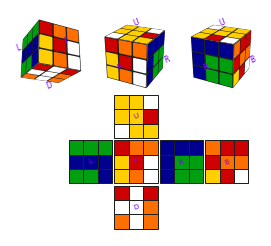

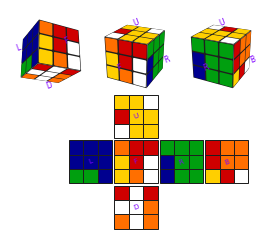

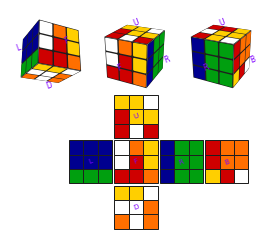

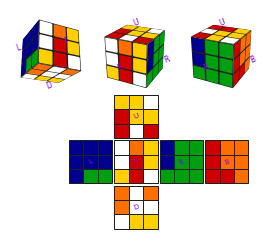

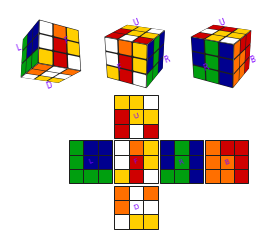

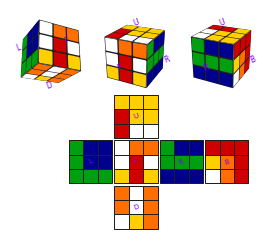

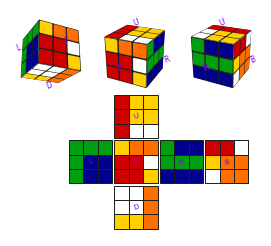

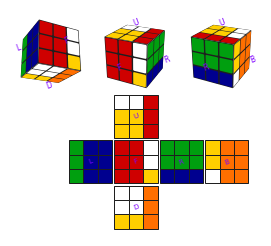

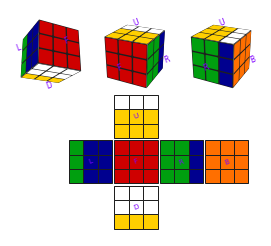

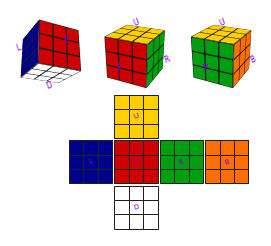

In [5]:
fc2 = face.FaceCube()
fc2.from_string("LUFUURLFDRFRLRDLBBFDBBFFLLFBDURDDRUUDRDLLLFBUUFBRBURBD")
cb3 = fc2.to_cubie_cube()
sol = solveCubie(cb3,True)